In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('C:\\Users\\satis\\Downloads\\Oasis\\Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
df.duplicated().any()

True

In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
print(df.isnull().any())
print('-'*60)
print(df.duplicated().any())

Region                                     False
Date                                       False
Frequency                                  False
Estimated Unemployment Rate (%)            False
Estimated Employed                         False
Estimated Labour Participation Rate (%)    False
Area                                       False
dtype: bool
------------------------------------------------------------
False


In [11]:
print(f'Shape of the df--> {df.shape[0]} Rows {df.shape[1]} Columns')

Shape of the df--> 740 Rows 7 Columns


In [36]:
pd.DataFrame(df.groupby('Area').value_counts())

0
Area  Region           Date       Frequency Estimated Unemployment Rate (%) Estimated Employed Estimated Labour Participation Rate (%) Day Month    Year   
Rural Andhra Pradesh   2019-05-31  Monthly  3.65                            0.261321           43.24                                   31  May      2019  1
                       2019-06-30  Monthly  3.05                            0.256002           42.05                                   30  June     2019  1
      Jammu & Kashmir  2019-10-31  Monthly  19.27                           0.053101           43.08                                   31  October  2019  1
      Himachal Pradesh 2020-02-29  Monthly  15.42                           0.041617           42.45                                   29  February 2020  1
                       2020-03-31  Monthly  17.71                           0.038292           40.17                                   31  March    2020  1
...                                                                                                                                                      ..
Urban Andhra Pradesh   2019-10-31 Monthly   4.70                            0.103327           36.41                                   31  October  2019  1
                       2019-11-30 Monthly   7.54                            0.101018           36.62                                   30  November 2019  1
                       2019-12-31 Monthly   7.88                            0.106380           38.61                                   31  December 2019  1
                       2020-01-31 Monthly   7.11                            0.099926           35.91                                   31  January  2020  1
      West Bengal      2020-06-30 Monthly   9.86                            0.197680           37.57                                   30  June     2020  1

[740 rows x 1 columns]

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Assuming df is your DataFrame and 'Estimated Employed' is the column you want to scale
mm = MinMaxScaler()

# Reshape the data to make it 2-dimensional
data = np.array(df['Estimated Employed']).reshape(-1, 1)

# Perform Min-Max scaling
df['Estimated Employed'] = mm.fit_transform(data)


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [15]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Day,Year
count,740.000000,740.000000,740.000000,740.000000,740.000000
mean,11.787946,0.156469,42.630122,30.502703,2019.418919
std,10.721298,0.176871,8.111094,0.627509,0.493716
min,0.000000,0.000000,13.330000,29.000000,2019.000000
25%,4.657500,0.024952,38.062500,30.000000,2019.000000
50%,8.350000,0.102667,41.160000,31.000000,2019.000000
75%,15.887500,0.245496,45.505000,31.000000,2020.000000
max,76.740000,1.000000,72.570000,31.000000,2020.000000


In [16]:
# Mean unemployment rate
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# Median unemployment rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployment rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')

Mean Unemployment Rate: 11.79%
Median Unemployment Rate: 8.35%
Standard Deviation of Unemployment Rate: 10.72%


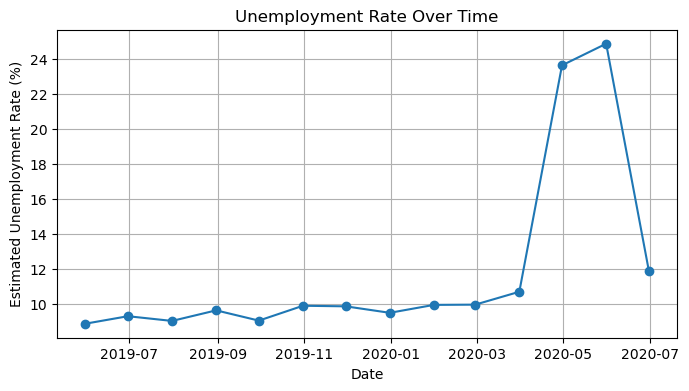

In [17]:
#df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().plot(kind='line') using pandas

unemployment_mean = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(8, 4))
plt.plot(unemployment_mean.index, unemployment_mean.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

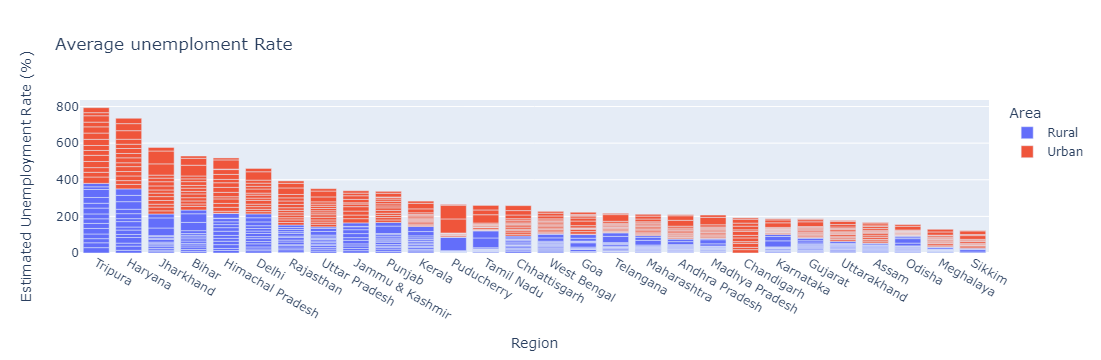

<Figure size 1000x600 with 0 Axes>

In [31]:
plt.figure(figsize=(10, 6))

fig = px.bar(df, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Area", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

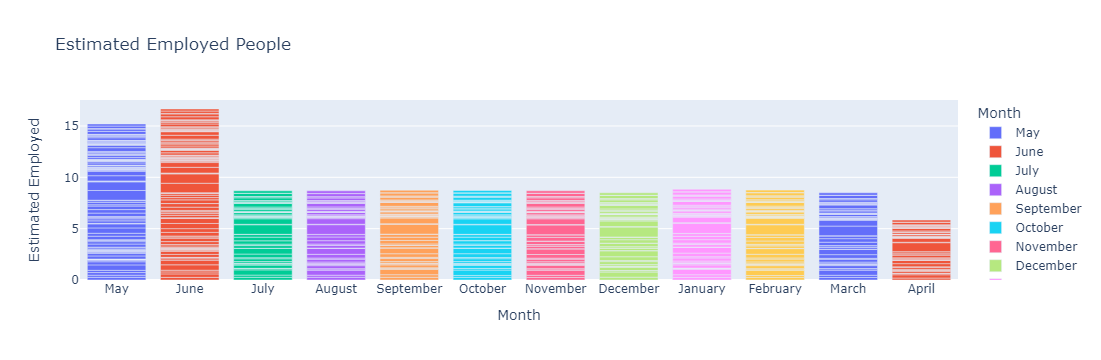

<Figure size 1000x600 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 6))

fig = px.bar(df, x = 'Month', y = 'Estimated Employed', color = 'Month', title = 'Estimated Employed People')
fig.show()


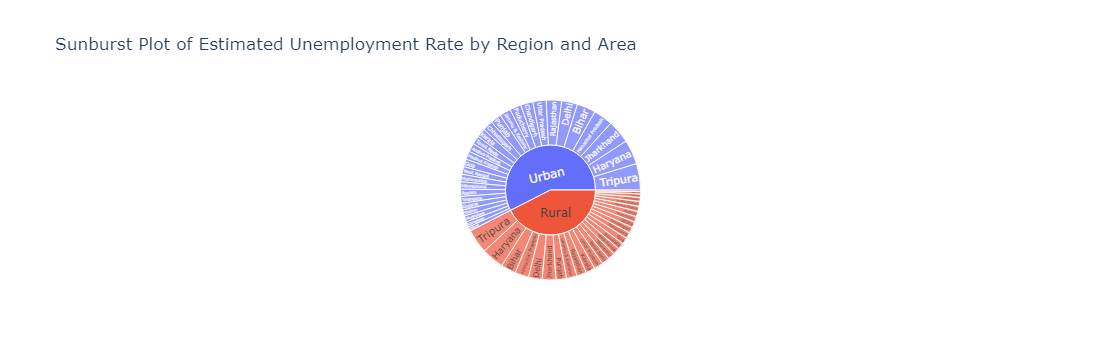

<Figure size 1000x600 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 6))
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', 
                  title='Sunburst Plot of Estimated Unemployment Rate by Region and Area')
fig.show()


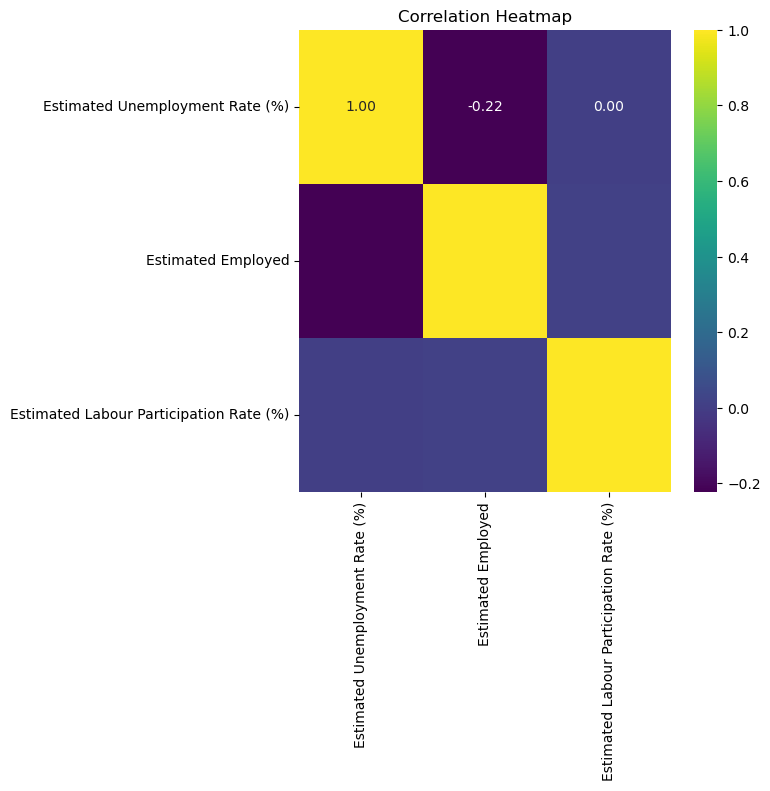

In [25]:
# Calculate correlation matrix
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Example: Test if there is a significant difference in unemployment rates between urban and rural areas
from scipy.stats import ttest_ind

urban_unemployment = df[df['Area'] == 'Urban']['Estimated Unemployment Rate (%)']
rural_unemployment = df[df['Area'] == 'Rural']['Estimated Unemployment Rate (%)']

t_stat, p_val = ttest_ind(urban_unemployment, rural_unemployment)
print(f'T-Statistic: {t_stat:.2f}')
print(f'P-Value: {p_val:.2f}')

T-Statistic: 3.63
P-Value: 0.00


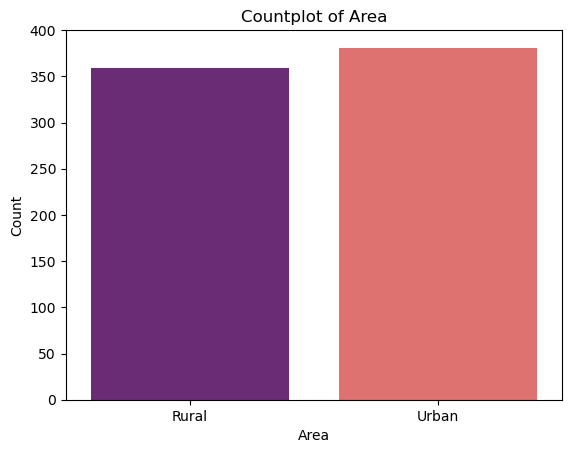

In [30]:
sns.countplot(x='Area', data=df,palette='magma')
plt.title('Countplot of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

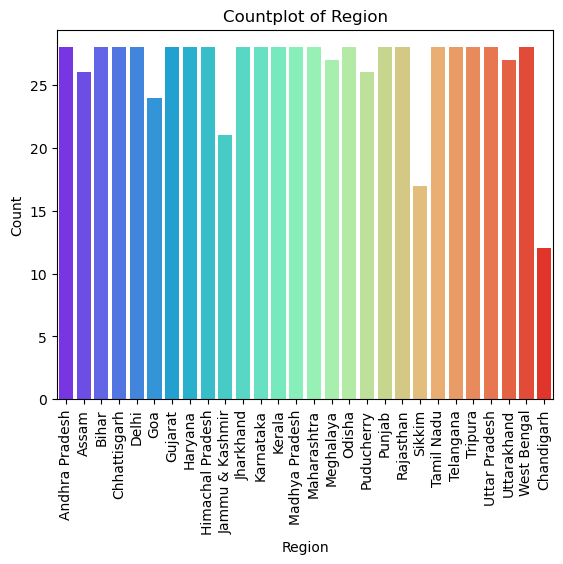

In [29]:
sns.countplot(x='Region', data=df,palette='rainbow')
plt.xticks(rotation ='vertical')
plt.title('Countplot of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()